# Quora Insincere Questions Classification

## Capstone Project Two : Springboard Data Science career track

### Notebook by Shalin Gosalia

## Introduction

### 1. The problem 


Quora is a platform that empowers people to learn from each other. On Quora, people can ask questions and connect with others who contribute unique insights and quality answers. A key challenge is to weed out insincere questions -- those founded upon false premises, or that intend to make a statement rather than look for helpful answers.

An existential problem for any major website today is how to handle toxic and divisive content. Quora wants to tackle this problem head-on to keep their platform a place where users can feel safe sharing their knowledge with the world.

### 2. The Data:

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. 

Data files contain
- Training and testing data set where training data set contains quora questionId’s with insincere content marked by value = 1, otherwise 0
- Number of word embeddings along with the dataset that can be used in the models
The file is a matrix of about 376 thousand observations and 7 variables.


For the purpose of this project, I downloaded the data from the Kaggle website. 
- Therafter I performed Data Wrangling, pre-processing and training data development
- After the above steps, the data was condensed into 101K observations which is further broken down into training and testing data set containing 506 features created by count vectorization of 'question_text' column

These are some data wrangling and exploratory analysis from the previous part. For details on how the data was pre-processed and how EDA was performed, see the following notebooks:

https://github.com/shalin4788/Springboard/blob/master/Capstone%20Two/Quora%20Insincere%20Capstone%20Data%20Wrangling.ipynb
https://github.com/shalin4788/Springboard/blob/master/Capstone%20Two/EDA_Quora%20Insincere%20Capstone%20Data.ipynb
https://github.com/shalin4788/Springboard/blob/master/Capstone%20Two/Preprocessing%20and%20Training%20Data%20Development.ipynb

### 3. The questions of interest:

**Objective** - Develop models that identify and flags/ correctly classifies insincere questions and determine classification scores

### 4. Import the necessary libraries and the data:

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. 

In [1]:
#os.getcwd()
#os.chdir

import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\gosal\Anaconda3_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_df = pd.read_csv('.\data\FeatureEngineering_Train.csv')
test_df = pd.read_csv('.\data\FeatureEngineering_Test.csv')

In [3]:
#cat /proc/sys/vm/overcommit_memory

In [3]:
train_df = train_df[train_df.columns.drop('Unnamed: 0')]
train_df.head(2)

,qid,target,question_length,total_words,avg_word_length_scaled,question_final,Counts_10 year ago,Counts_10 year experi,Counts_10 year old,Counts_11 year old,...,Counts_year old kid,Counts_year old male,Counts_year old man,Counts_year old son,Counts_year old start,Counts_year old want,Counts_year old woman,Counts_year question paper,Counts_year work experi,Counts_youtub channel learn
0,2999215872019d2a27fd,0,59,10,0.111321,much would pay whole loaf pumpkin bread piec p...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77a247715e50b684b25e,0,37,4,0.174528,recognis differ chiffon georgett,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df = test_df[test_df.columns.drop('Unnamed: 0')]
test_df.head(2)

,qid,target,question_length,total_words,avg_word_length_scaled,question_final,Counts_10 year ago,Counts_10 year experi,Counts_10 year old,Counts_11 year old,...,Counts_year old kid,Counts_year old male,Counts_year old man,Counts_year old son,Counts_year old start,Counts_year old want,Counts_year old woman,Counts_year question paper,Counts_year work experi,Counts_youtub channel learn
0,3f2dbbc68b33555caf0c,0,34,6,0.106918,much would cost build hotel africa,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,c9f7a145bd340d0ae1c9,0,69,11,0.118353,eras entir hard drive dell inspiron recent mod...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Feature Selection

These following features are engineered, from any given data column

In [5]:
X = train_df.loc[:, ~train_df.columns.isin(['qid','target','question_length','total_words','avg_word_length_scaled','question_final'])]
y = train_df['target']

### 6. Modeling

This is a classification problem, in supervised learning. Here we have used the following classification models:

- Logistic Regression
    - Naive
    - With L2 regularization
- Naive Bayes
- Decision Trees
- Random Forest
- Gradient Boost

In [6]:
#Import ML models:
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree,metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, precision_recall_fscore_support as score
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, roc_curve, auc

In [8]:
#$ cat /proc/sys/vm/overcommit_memory

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

##### 6a. Logistic Regression

###### Logistic Regression (Naive)

In [10]:
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_train, y_train)
# Print the accuracy from the testing data.
print('====Naive Logistic Regression====')
print('Accuracy score:', accuracy_score(y_test, clf.predict(X_test)))
print('Precision score:', precision_score(y_test, clf.predict(X_test)))

====Naive Logistic Regression====
Accuracy score: 0.9381411189023265
Precision score: 0.6521739130434783


###### Logistic Regression (With L2 Regularization)

In [11]:
C_param_range = [1,10,100, 1000, 10000]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    #Predict using model
    #train_score = Logreg.score(X_train, y_train)
    y_pred_lr = Logreg.predict(X_test)
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,1,0.938141
1,10,0.938166
2,100,0.938162
3,1000,0.938153
4,10000,0.938158


====Logistic Regression w/ L2 Regularization====
Accuracy: 0.9381657083608257
Balanced accuracy: 0.5020053827864013
Precision score 0.6363636363636364
Recall score 0.004168044988422097


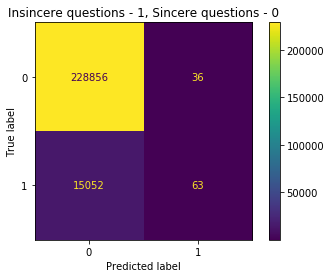

[[228856     36]
 [ 15052     63]]


In [12]:
Logreg = LogisticRegression(penalty = 'l2', C = 10,random_state = 40)

Logreg.fit(X_train,y_train)

y_pred_lr = Logreg.predict(X_test)
print('====Logistic Regression w/ L2 Regularization====')
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_lr))
print('Balanced accuracy:', metrics.balanced_accuracy_score(y_test,y_pred_lr))
print('Precision score' , metrics.precision_score(y_test,y_pred_lr, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred_lr, pos_label = 1))
cnf_matrix= confusion_matrix(y_test,y_pred_lr)

_ = plot_confusion_matrix(Logreg, X_test, y_test) 
_ = plt.title('Insincere questions - 1, Sincere questions - 0')
_ = plt.show()

print(cnf_matrix)

#### 6b. Naive Bayes

In [13]:
#def train_KNN(n_neighbors):
#    # Apply K-nearest Neighbor model to training data
#    knn = KNeighborsClassifier(n_neighbors = n)
#    knn.fit(X_train, y_train)
#    train_score = knn.score(X_train, y_train)
#    test_score = knn.score(X_test, y_test)
#    y_pred_knn = knn.predict(X_test)
#    print('Train score: {} / Test score: {} for {} neighbors'.format(train_score, test_score, n))

In [ ]:
#for n in range(1,2):
#    train_KNN(n)

In [28]:
#knn = KNeighborsClassifier(n_neighbors = 2, weights = 'distance', metric='wminkowski', p=2, metric_params=dict(w=2))
#knn.fit(X_train, y_train)

#train_score = knn.score(X_train, y_train)
#test_score = knn.score(X_test, y_test)

# Predict using Knn model
#y_pred_knn = knn.predict(X_test)
#print('====Knn model====')
#print('Train score: {} / Test score: {} for 5 neighbors'.format(train_score, test_score))
#print('Accuracy:', metrics.accuracy_score(y_test,y_pred_knn))
#print('Balanced accuracy:', metrics.balanced_accuracy_score(y_test,y_pred_knn))
#print('Precision score' , metrics.precision_score(y_test,y_pred_knn, pos_label = 1))
#print('Recall score' , metrics.recall_score(y_test,y_pred_knn, pos_label = 1))

In [30]:
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:
y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print('====Naive Bayes====')
print('Accuracy:', metrics.accuracy_score(y_test,y_predict_nb))
print('Balanced accuracy:', metrics.balanced_accuracy_score(y_test,y_predict_nb))
print('Precision score' , metrics.precision_score(y_test,y_predict_nb, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_predict_nb, pos_label = 1))

====Naive Bayes====
Accuracy: 0.08304269959468376
Balanced accuracy: 0.5096080280692799
Precision score 0.06308611828961312
Recall score 0.9964935494541846


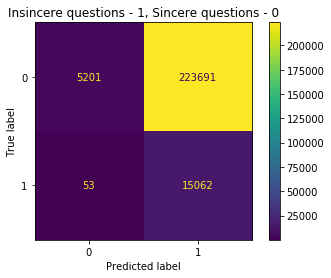

[[  5201 223691]
 [    53  15062]]


In [32]:
cnf_matrix= confusion_matrix(y_test,y_predict_nb)

_ = plot_confusion_matrix(nb, X_test, y_test) 
_ = plt.title('Insincere questions - 1, Sincere questions - 0')
_ = plt.show()

print(cnf_matrix)

#### 6c. Decision Trees

In [ ]:
# Declare a variable called gini_model w/ no max_depth and assign it: 
#gini_model_1 = tree.DecisionTreeClassifier(criterion ="gini", random_state = 42)

# Call fit() on gini_model, and pass in X_train and y_train, in that order 
#gini_model_1.fit(X_train, y_train)


# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
#y_pred_dt = gini_model_1.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
#y_pred_dt = pd.Series(y_pred_dt)

# Check out gini_model
#gini_model_1

Running a 'no max depth' gini model is computationally more expensive and takes a long time to be trained and tested. Hence for the purpose of this project, we will set max depth as 5 and run the Decision Tree Classifier model

In [14]:
# Declare a variable called gini_model, make the max_depth parameter equal to 10 and assign it: 
gini_model_2 = tree.DecisionTreeClassifier(criterion ="gini", max_depth = 10, random_state = 42)

# Call fit() on gini_model, and pass in X_train and y_train, in that order 
gini_model_2.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_dt_2 = gini_model_2.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred_dt_2 = pd.Series(y_pred_dt_2)

# Check out gini_model
gini_model_2

DecisionTreeClassifier(max_depth=10, random_state=42)

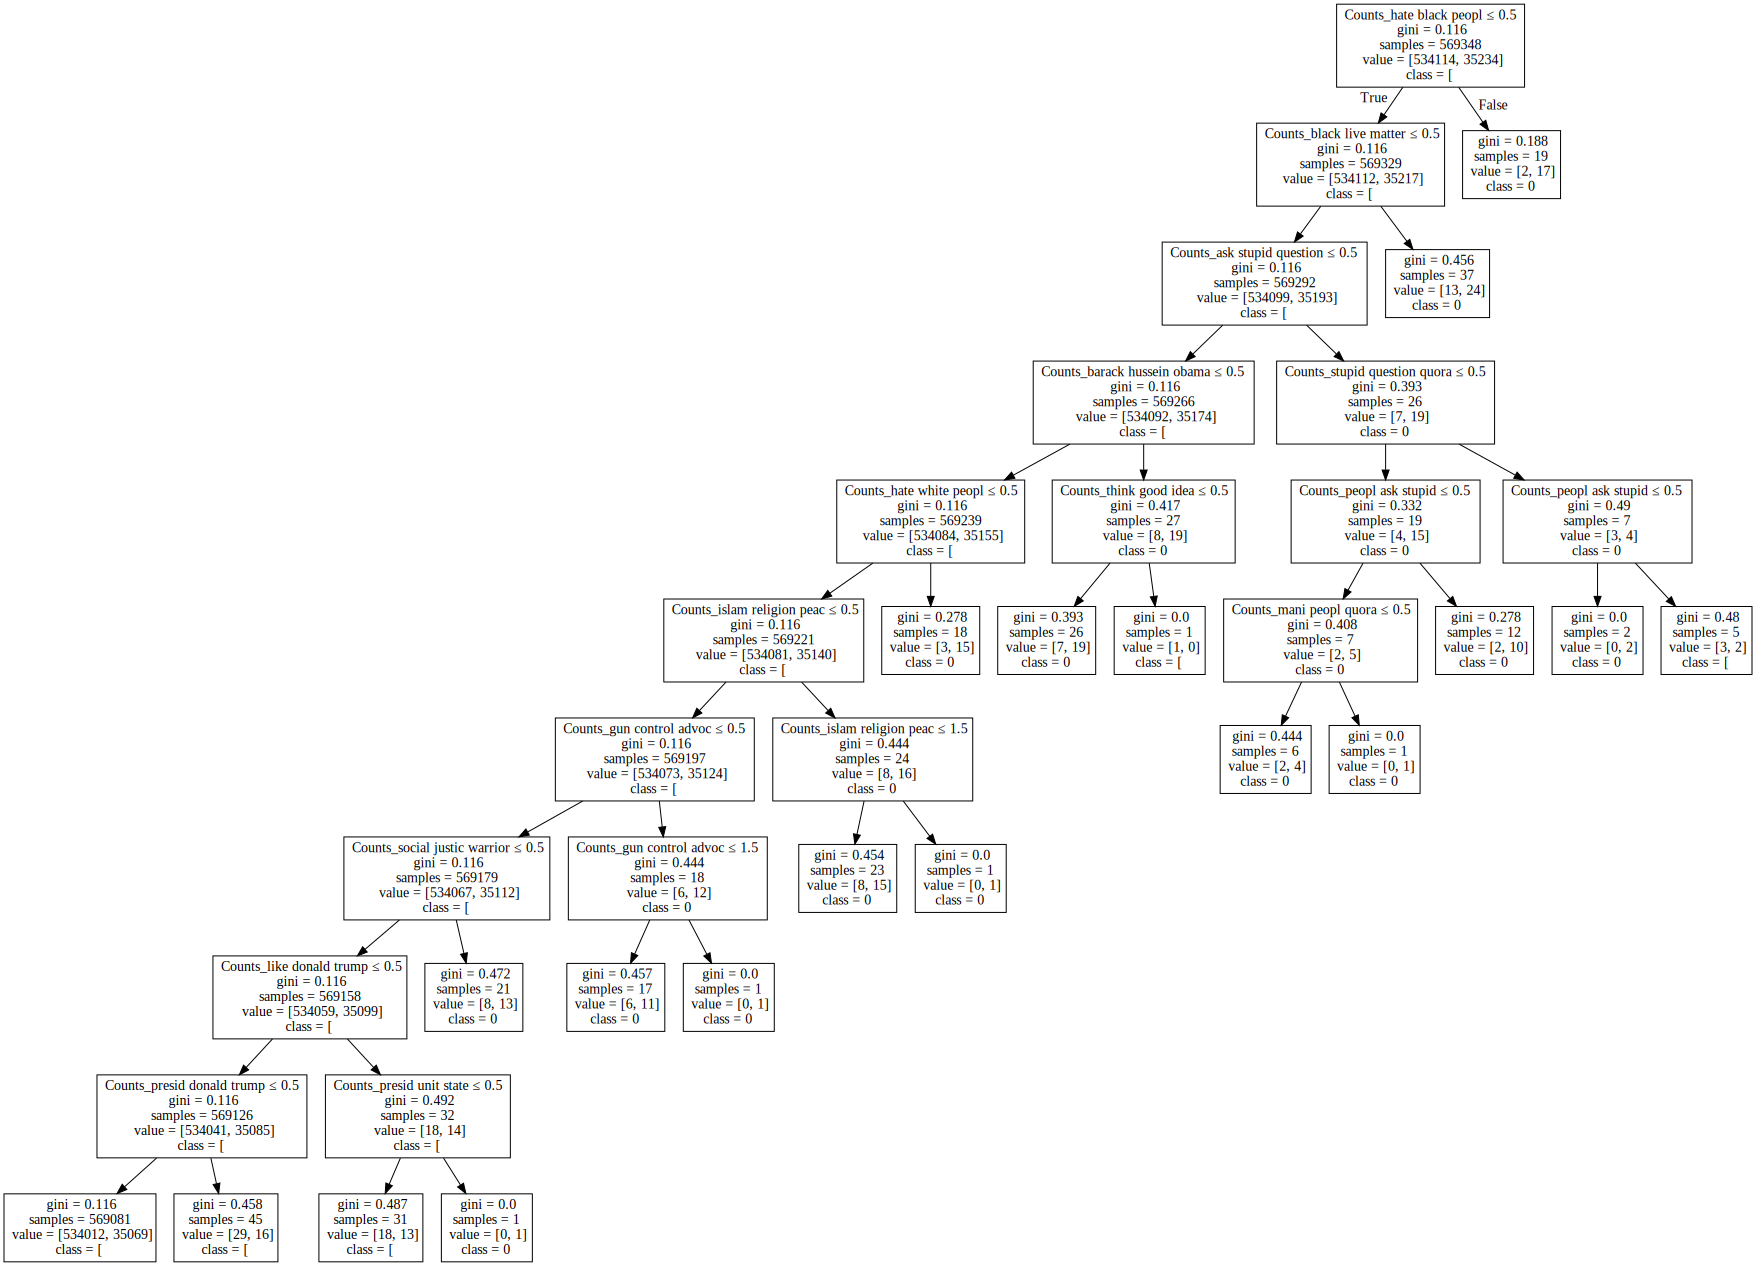

In [15]:
# Now we want to visualize the tree
# We can do so with export_graphviz

import graphviz 
dot_data = tree.export_graphviz(gini_model_2, out_file=None,feature_names=X_train.columns,
                                class_names=str(np.unique(y_train)), 
                                filled=False, rounded=False,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [16]:
print('====Decision Tree: Gini impurity  model - max depth 10====')
print('Accuracy:', round(metrics.accuracy_score(y_test,y_pred_dt_2),3))
print('Balanced accuracy:', round(metrics.balanced_accuracy_score(y_test,y_pred_dt_2),3))
print('Precision score' , round(metrics.precision_score(y_test,y_pred_dt_2, pos_label = 1),3))
print('Recall score' , round(metrics.recall_score(y_test,y_pred_dt_2, pos_label = 1),3))

====Decision Tree: Gini impurity  model - max depth 10====
Accuracy: 0.938
Balanced accuracy: 0.502
Precision score 0.667
Recall score 0.004


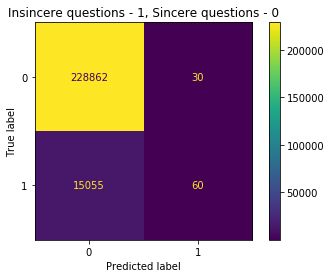

[[228862     30]
 [ 15055     60]]


In [17]:
cnf_matrix= confusion_matrix(y_test,y_pred_dt_2)

_ = plot_confusion_matrix(gini_model_2, X_test, y_test) 
_ = plt.title('Insincere questions - 1, Sincere questions - 0')
_ = plt.show()

print(cnf_matrix)

#### 6d. Random Forest

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_rf = rf.fit(X_train, y_train)

#Predict test data
y_pred_rf = model_rf.predict(X_test)

print('====Random Forest====')
print('Accuracy score:', accuracy_score(y_test, y_pred_rf))
print('Precision score:', precision_score(y_test,y_pred_rf, pos_label = 1))
print('f1-score:', f1_score(y_test, y_pred_rf, average='weighted'))

====Random Forest====
Accuracy score: 0.9381984943054912
Precision score: 0.6666666666666666
f1-score: 0.9087051186104059


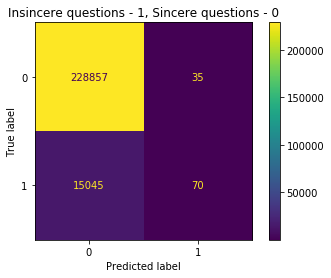

[[228857     35]
 [ 15045     70]]


In [19]:
cnf_matrix= confusion_matrix(y_test,y_pred_rf)

_ = plot_confusion_matrix(model_rf, X_test, y_test) 
_ = plt.title('Insincere questions - 1, Sincere questions - 0')
_ = plt.show()

print(cnf_matrix)

#### 6e. Gradient Boosting

In [20]:
def train_GB(n_est, max_features, max_depth):
    gb = GradientBoostingClassifier(n_estimators = n_est, max_features = max_features, max_depth=max_depth)
    gb_model = gb.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred_gb, pos_label=1, average='binary')
    print('Est: {} / Features: {} / Depth: {} / ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, max_features, max_depth, round(precision, 3), round(recall, 3), 
        round((y_pred_gb==y_test).sum()/len(y_pred_gb), 3)))

In [ ]:
for n_est in [150, 300]:
    for max_features in [50, 200]:
        for max_depth in [10, 20]:
            train_GB(n_est, max_features, max_depth)

Est: 150 / Features: 50 / Depth: 10 / ---- Precision: 0.673 / Recall: 0.005 / Accuracy: 0.938
Est: 150 / Features: 50 / Depth: 20 / ---- Precision: 0.67 / Recall: 0.005 / Accuracy: 0.938
Est: 150 / Features: 200 / Depth: 10 / ---- Precision: 0.661 / Recall: 0.005 / Accuracy: 0.938
Est: 150 / Features: 200 / Depth: 20 / ---- Precision: 0.676 / Recall: 0.005 / Accuracy: 0.938
Est: 300 / Features: 50 / Depth: 10 / ---- Precision: 0.667 / Recall: 0.005 / Accuracy: 0.938
Est: 300 / Features: 50 / Depth: 20 / ---- Precision: 0.664 / Recall: 0.005 / Accuracy: 0.938


In [ ]:
#for max_features in [50, 200]:
#    for max_depth in [10,20]:
#        train_GB(200, max_features, max_depth)

In [22]:
learning_rates = [0.5, 1]
for learning_rate in learning_rates:
    gb_updated = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=50, max_depth = 10, random_state = 0)
    start = time.time()
    gb_model = gb_updated.fit(X_train, y_train)
    end = time.time()
    training_time = (end - start)

    start = time.time()
    y_pred_gb_updated = gb_model.predict(X_test)
    end = time.time()
    pred_time = (end - start)
    
    print('====Gradient Boosting Model====')
    print("Training time:", training_time)
    print("Test prediction time:", pred_time)
    print("Learning rate: ", learning_rate)
    print('Accuracy score:', accuracy_score(y_test, y_pred_gb_updated))
    print('Precision score:', precision_score(y_test,y_pred_gb_updated, pos_label = 1))
    print()

====Gradient Boosting Model====
Training time: 126.30997610092163
Test prediction time: 3.2382829189300537
Learning rate:  0.5
Accuracy score: 0.9381902978193248
Precision score: 0.6434782608695652

====Gradient Boosting Model====
Training time: 133.70625472068787
Test prediction time: 3.2153844833374023
Learning rate:  1
Accuracy score: 0.9379894839082485
Precision score: 0.4344262295081967



In [50]:
# choose precision score derived at 0.5 learning rate since that is higher. Lower the learning rate, 
#the precision score of test data is higher, since there is less overfitting in this case
roc_auc_gb = round(0.6434782608695652, 3)

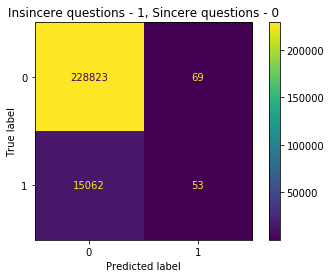

[[228823     69]
 [ 15062     53]]


In [33]:
cnf_matrix= confusion_matrix(y_test,y_pred_gb_updated)

_ = plot_confusion_matrix(gb_updated, X_test, y_test) 
_ = plt.title('Insincere questions - 1, Sincere questions - 0')
_ = plt.show()

print(cnf_matrix)

### 7. Compare Model performances

In [51]:
myLabels = ['Logistic Regression','Logistic Regression w/ L2 Regularization','Naive Bayes', 'Gini Decision Tree', 'Random Forest', 'Gradient Boosting' ]
Precision_score = [precision_score(y_test, clf.predict(X_test)), precision_score(y_test,y_pred_lr), precision_score(y_test,y_predict_nb), precision_score(y_test,y_pred_dt_2), 
                  precision_score(y_test,y_pred_rf), roc_auc_gb]
ROC_score = [roc_auc_score(y_test, clf.predict(X_test)), roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_predict_nb), roc_auc_score(y_test, y_pred_dt_2), 
             roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_gb_updated)]

score_tab_pr = pd.DataFrame(list(zip(myLabels, Precision_score)), 
               columns =['Algorithm', 'Model precision score']) 

score_tab_roc = pd.DataFrame(list(zip(myLabels, ROC_score)), 
               columns =['Algorithm', 'ROC AUC score']) 

print(score_tab_pr)
print(score_tab_roc)

                                  Algorithm  Model precision score
0                       Logistic Regression               0.652174
1  Logistic Regression w/ L2 Regularization               0.636364
2                               Naive Bayes               0.063086
3                        Gini Decision Tree               0.666667
4                             Random Forest               0.666667
5                         Gradient Boosting               0.643000
                                  Algorithm  ROC AUC score
0                       Logistic Regression       0.501436
1  Logistic Regression w/ L2 Regularization       0.502005
2                               Naive Bayes       0.509608
3                        Gini Decision Tree       0.501919
4                             Random Forest       0.502239
5                         Gradient Boosting       0.501602


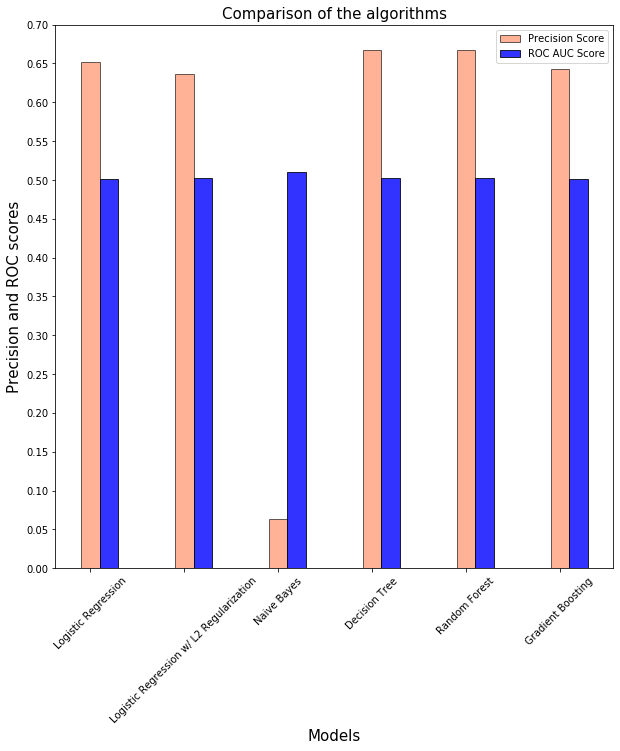

In [53]:
#plotting and comparing ROC-AUC scores:

index=[1,2,3,4,5,6]
index_roc=[1.2, 2.2, 3.2, 4.2, 5.2, 6.2]
plt.figure(figsize=(10,10))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Precision and ROC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)

plt.yticks(np.arange(0, 1, 0.05), )
plt.xticks([1,2,3,4,5,6], ["Logistic Regression", "Logistic Regression w/ L2 Regularization", "Naive Bayes", "Decision Tree", "Random Forest", "Gradient Boosting"], rotation=45)
_=plt.bar(index, Precision_score, label = 'Precision Score',color='coral',alpha=0.6, edgecolor='k',width=0.2)
_=plt.bar(index_roc, ROC_score, color='blue',label = 'ROC AUC Score', alpha=0.8, edgecolor='k',width=0.2)
plt.legend()
plt.savefig("model_comparison.png")
plt.show()

### Conclusion 1

Since we want to weed out insincere questions from Quora dataset, it is important to have a high precision score (less number of false positive) for 1 - insincere questions
Hence 'Precision' and 'ROC-AUC' scores for test data are plotted. 
The two best performing models are the Decision tree and Random forest (see reasoning below)

- Logistic Regression and even Logistic Regression w/ L2 regularization yielded lower performance and ROC-AUC scores, hence were rejected.
- Naive Bayes classifier's gave an extremely low precision score but a very high true positive rate, since it goes with the assumption that features are independent of one another when conditioned upon class labels which is not true in this case. Hence the model can be deemed not very useful for this use case.
- KNN model was also attempted, but it was taking forever to run considering the size of the dataset, in this case n is close to 1 mn records, hence the computational time is around  O[N log(N)] time - hence the algorithm was stopped midway and rejected.
- Gradient Boosting after performing multiple hyperparameter tuning at 0.5 learning rate, though has better scores compared to Logistic regression and Naive Bayes models, still is low enough when compared to decision tree and Random forest. 


- After multiple trials, it seems like Decision tree  at max_depth = 10 using gini model, gives a better performance and is extremely fast when compared to Gradient Boosting. 
- Random forest, another ensemble Decision tree model gives almost the same level of performance as Decision tree (w/ gini impurity) whose performance can be enhanced using some CV and hyperparameter tuning which is what we will do in next step.

### 8.  Applying Grid search CV for hyperparameter Tuning:

##### 8.a Parameter Tuning for Random Forest

In [46]:
#https://stats.stackexchange.com/questions/286107/setting-leaf-nodes-minimum-sample-value-for-random-forest-decision-trees

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_features": ['auto', 'sqrt', 'log2'],
              "max_depth" : [2,5,10],
              "n_estimators": [100, 200, 300]}

rf_cv_model = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

rf_cv = rf_cv_model.fit(X_train, y_train)

print(rf_cv.best_estimator_) 
print(rf_cv.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 58.5min finished


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=1)
0.9381204465424068


In [47]:
#https://stats.stackexchange.com/questions/286107/setting-leaf-nodes-minimum-sample-value-for-random-forest-decision-trees

from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
              "max_features": ['auto', 'sqrt', 'log2'],
              "max_depth" : [2,5,10],
              "n_estimators": [100, 200, 300]}

rf_cv_model_2 = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='precision', cv=3, n_jobs=-1, verbose=1)

rf_cv_2 = rf_cv_model_2.fit(X_train, y_train)

print(rf_cv_2.best_estimator_) 
print(rf_cv_2.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 56.3min finished


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=1)
0.2380952380952381


##### 8.b Parameter Tuning for Decision Tree

In [10]:
dt = tree.DecisionTreeClassifier()

parameters = {'criterion':['gini', 'entropy'],
              'max_depth':range(10,20)}

dt_cv_model = GridSearchCV(estimator=dt, param_grid = parameters, scoring='precision', cv=3, n_jobs=-1, verbose=1)

dt_cv = dt_cv_model.fit(X_train, y_train)

print(dt_cv.best_estimator_) 
print(dt_cv.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.7min finished


DecisionTreeClassifier(max_depth=10)
0.6753522394292174


### 9. Feature importance, ROC AUC Score and Precision Score

Plotting the feature importances is one way that you can gain a perspective on which features are driving the model predictions.

30


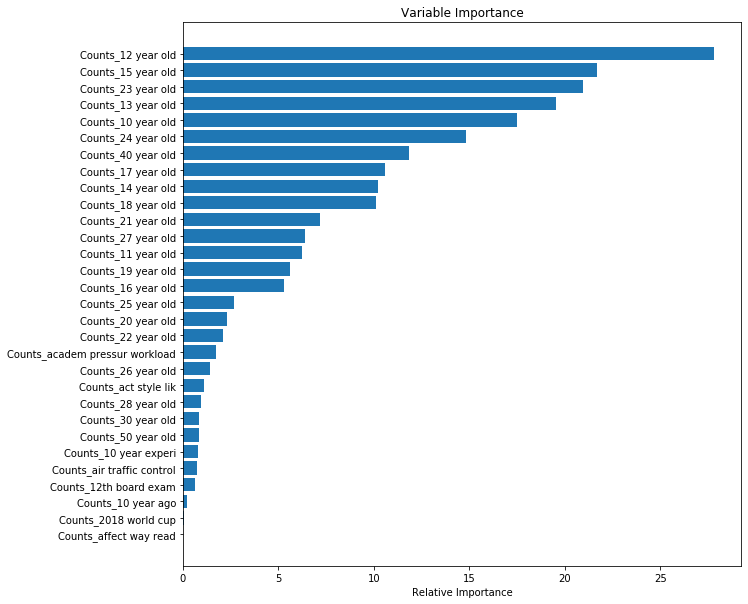

In [20]:
dt.fit(X_train, y_train)
feature_importance = dt.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

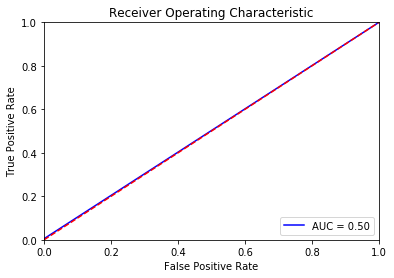

In [32]:
import sklearn.metrics as metrics

y_predictions_dt_final = dt_cv.predict_proba(X_test)[:, 1]
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predictions_dt_final)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC-AUC score.png")
plt.show()

In [28]:
roc_auc_score = round(roc_auc_score(y_test,y_predictions_dt_final),3)
print(roc_auc_score)

0.503


### Conclusion 2

**Final model output**

In above steps
- Cross-Validation procedure was performed under the k-fold CV approach. In order to improve performance of model, random pair of training and validation data is chosen by splitting the training set iinto k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.
- It was observed that there was a marginal improvement in performance when hyperparameter turning was done on Decision Tree Model, but not on Random forest model (possibly limited the range of hyperparamters considering the computational inefficiencies of running the model on local CPU)
- Hence for this use case, Decision tree model scores best amongst other models in terms of precision and ROC-AUC scores 
    - Precision score - 0.675
    - ROC AUC score - 0.503
        - Also, the model execution time was very low which is great for future predictions.
- There are limitations in the system and lack of GPU causes memory allocation issue, hence the models were not tuned to the point of getting an ehnanced score.

**Future Scope**

In a real world, with the usage of sophisticated processors and availability of more resources, model performances can be enhanced further, but none of that is covered as a scope of this capstone